<a href="https://colab.research.google.com/github/toryn13/Rexamples/blob/main/phospho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
download.file("https://raw.githubusercontent.com/toryn13/Rexamples/main/phospho.txt", "phospho.txt")

In [ ]:
%%R
library(tidyverse)

In [ ]:
%%R
phospho<-read_table("phospho.txt")


── Column specification ────────────────────────────────────────────────────────
cols(
  pAFT2 = col_double(),
  pHSP27 = col_double(),
  pP38 = col_double(),
  pP90 = col_double(),
  pMEK = col_double(),
  pSTAT3 = col_double(),
  GROUP = col_character(),
  TREATMENT = col_character(),
  SUBJECT = col_double()
)



In [ ]:
%%R
phospho

# A tibble: 36 × 9
   pAFT2 pHSP27  pP38  pP90  pMEK pSTAT3 GROUP TREATMENT SUBJECT
   <dbl>  <dbl> <dbl> <dbl> <dbl>  <dbl> <chr> <chr>       <dbl>
 1 1114.    112  225.  235  1711.  1711. H     Control         1
 2  433.    132  156.   86   224.  1711. H     Control         2
 3  232.    193  284.   76   224.  1915. H     Control         3
 4  727.    176  174.   87   843.   382. H     Control         4
 5 1538.    101  252.  228. 2196.  1199. H     Control         5
 6 1068.    311  265.   97   995.   547. H     Control         6
 7  853.    319  313.  162  2159.   294. H     Control         7
 8  191.    352  182.   79   361.  1360. H     Control         8
 9 2827.    156  229.  230.  766.   316. H     Control         9
10  735.    195  319.  181  1711.  1642. RA    Control        10
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R
phosphoL<-phospho%>%pivot_longer(cols=starts_with("p"), values_to="Intensity", names_to="protein")

In [ ]:
%%R
phosphoL

# A tibble: 216 × 5
   GROUP TREATMENT SUBJECT protein Intensity
   <chr> <chr>       <dbl> <chr>       <dbl>
 1 H     Control         1 pAFT2       1114.
 2 H     Control         1 pHSP27       112 
 3 H     Control         1 pP38         225.
 4 H     Control         1 pP90         235 
 5 H     Control         1 pMEK        1711.
 6 H     Control         1 pSTAT3      1711.
 7 H     Control         2 pAFT2        433.
 8 H     Control         2 pHSP27       132 
 9 H     Control         2 pP38         156.
10 H     Control         2 pP90          86 
# ℹ 206 more rows
# ℹ Use `print(n = ...)` to see more rows


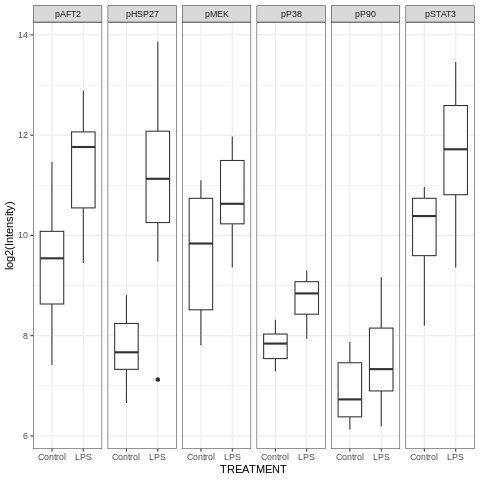

In [ ]:
%%R
phosphoL%>%ggplot(aes(TREATMENT,log2(Intensity)))+geom_boxplot()+facet_grid(~protein)+theme_bw()

In [ ]:
%%R
pval<-phosphoL %>%
  split(.$protein) %>%
  map(~ tidy(t.test(Intensity ~ TREATMENT, data = .x)))